### Importing Libraries

In [78]:
#Libraries Used

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct
import joblib
from array import array
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential #type:ignore
from tensorflow.keras.layers import Dense,Flatten #type:ignore

### To Load the MNIST data

In [55]:
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)     

In [56]:
training_images_filepath = 'train-images-idx3-ubyte/train-images-idx3-ubyte'
training_labels_filepath = 'train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_filepath = 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_filepath = 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [57]:
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [58]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
x_test=np.array(x_test)

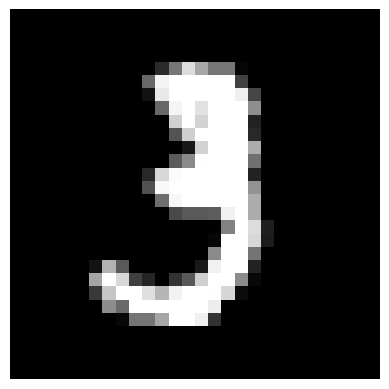

3

In [59]:
plt.imshow(x_train[10],cmap='gray')
plt.axis(False)
plt.show()
y_train[10]

### Data Preprocesing

In [60]:
x_train[0].max()

255

In [61]:
x_train=x_train/255
x_test=x_test/255

In [62]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Making a model

In [66]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(250,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(10,activation="softmax"))

In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 250)               196250    
                                                                 
 dense_3 (Dense)             (None, 100)               25100     
                                                                 
 dense_4 (Dense)             (None, 50)                5050      
                                                                 
 dense_5 (Dense)             (None, 10)                510       
                                                                 
Total params: 226910 (886.37 KB)
Trainable params: 226910 (886.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [68]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [70]:
history=model.fit(x_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 11s 6ms/step - loss: 0.2437 - accuracy: 0.9261 - val_loss: 0.1424 - val_accuracy: 0.9574
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0969 - accuracy: 0.9699 - val_loss: 0.0911 - val_accuracy: 0.9713
Epoch 3/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0699 - accuracy: 0.9778 - val_loss: 0.1552 - val_accuracy: 0.9515
Epoch 4/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0528 - accuracy: 0.9834 - val_loss: 0.0922 - val_accuracy: 0.9747
Epoch 5/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0415 - accuracy: 0.9866 - val_loss: 0.0988 - val_accuracy: 0.9724
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0330 - accuracy: 0.9892 - val_loss: 0.0966 - val_accuracy: 0.9741
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.1010 - val_accuracy

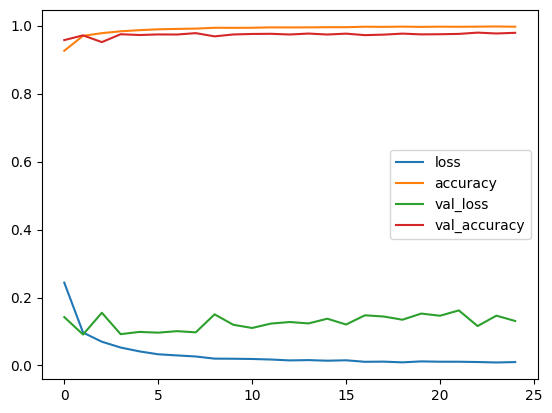

In [71]:
pd.DataFrame(history.history).plot()
plt.show()

In [74]:
y_prob=model.predict(x_test)

313/313 [==============================] - 0s 2ms/step


In [75]:
y_pred = y_prob.argmax(axis=1)

In [76]:
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred) #type:ignore

0.9806

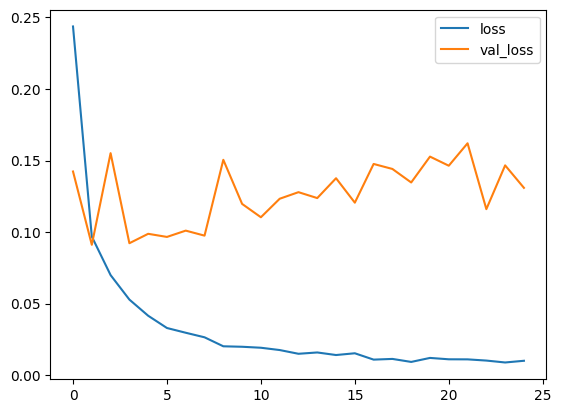

In [82]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

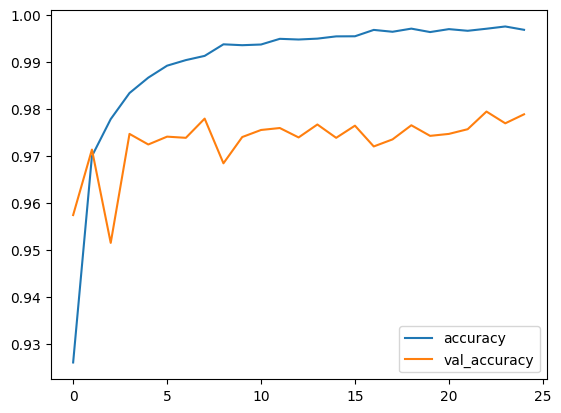

In [83]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])

1/1 [==============================] - 0s 28ms/step


array([3], dtype=int64)

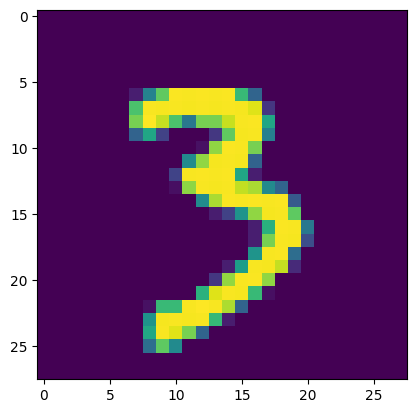

In [90]:
plt.imshow(x_test[30])
model.predict(x_test[30].reshape(1,28,28)).argmax(axis=1)

In [91]:
joblib.dump(model,"MNIST.sav")

['MNIST.sav']

In [92]:
loadedModel=joblib.load("./MNIST.sav")

1/1 [==============================] - 0s 23ms/step


4

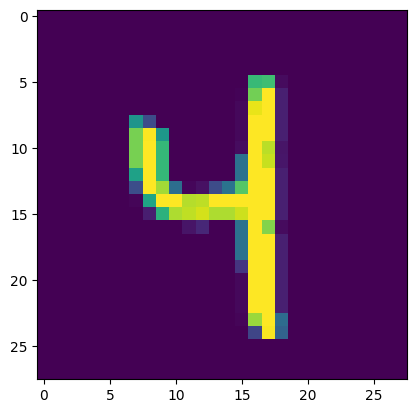

In [96]:
plt.imshow(x_test[4324])
loadedModel.predict(x_test[4324].reshape(1,28,28)).argmax()